<div align="center"><h3>HW4, Question 2</h3></div>
<div align="center"><h5>Mohammadreza Ghofrani, 400131076</h5></div>

In [1]:
import numpy as np
import matplotlib as mpl
from sklearn import metrics
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy.spatial.distance import cdist

# Configuration Parameter

In [2]:
SAVE_FIGURE = False

# Initialization

In [3]:
d31 = np.genfromtxt('data/2/D31.txt', delimiter='\t')
x_d31, y_d31 = d31[:, :-1], d31[:, -1]
rings = np.genfromtxt('data/2/rings.txt', delimiter='\t')
x_rings, y_rings = rings[:, 1:], rings[:, 0]
spiral = np.genfromtxt('data/2/spiral.txt', delimiter='\t')
x_spiral, y_spiral = spiral[:, :-1], spiral[:, -1]
compound = np.genfromtxt('data/2/Compound.txt', delimiter='\t')
x_compound, y_compound = compound[:, :-1], compound[:, -1]
pathbased = np.genfromtxt('data/2/pathbased.txt', delimiter='\t')
x_pathbased, y_pathbased = pathbased[:, :-1], pathbased[:, -1]

# Implementation

In [4]:
def isin_cluster(clusters, pt):
    for cluster in clusters:
        if pt in cluster:
            return True
    return False


def without_keys(d, keys):
    return {x: d[x] for x in d if x not in keys}


def expand_cluster(cluster, core_pts_nearby, core_pt):
    cluster.append(core_pt)
    for pt in core_pts_nearby[core_pt]:
        if pt in core_pts_nearby and \
            pt not in cluster:
            cluster.extend(expand_cluster(cluster=list(), 
                               core_pts_nearby=without_keys(core_pts_nearby, [core_pt]), 
                               core_pt=pt))
    return cluster


def nearest_core_pt_cluster(clusters, core_pts_nearby, neighbor_pts):
    for neighbor_pt in neighbor_pts:
        if neighbor_pt in core_pts_nearby:
            for i, cluster in enumerate(clusters):
                if neighbor_pt in cluster:
                    return i
    return 0

In [5]:
def dbscan(x_train, eps, min_pts):
    labels = np.zeros((x_train.shape[0],), dtype=int)
    core_pts_nearby = dict()
    border_pts_nearby = dict()
    pairwise_distance = cdist(x_train,x_train)
    for pt, dist in enumerate(pairwise_distance):
        nearby_pts = np.where((dist<=eps))[0][np.argsort(dist[dist<=eps])]
        nearby_pts = np.delete(nearby_pts, np.where(nearby_pts==pt))
        if len(nearby_pts) >= (min_pts - 1):
            core_pts_nearby[pt] = nearby_pts
        elif len(nearby_pts) > 0:
            border_pts_nearby[pt] = nearby_pts
    clusters = [list(),] # This empty list is for noise points
    for core_pt in core_pts_nearby:
        if not isin_cluster(clusters, core_pt):
            new_cluster = expand_cluster(list(), core_pts_nearby, core_pt)
            clusters.append(new_cluster)
            labels[new_cluster] = len(clusters) - 1
    for border_pt in border_pts_nearby:
        cluster_id = nearest_core_pt_cluster(clusters, core_pts_nearby, border_pts_nearby[border_pt])
        clusters[cluster_id].append(border_pt)
        labels[border_pt] = cluster_id
    return labels

In [6]:
def purity_score(y_true, y_pred):
    # compute contingency matrix (also called confusion matrix)
    contingency_matrix = metrics.cluster.contingency_matrix(y_true, y_pred)
    # return purity
    return np.sum(np.amax(contingency_matrix, axis=0)) / np.sum(contingency_matrix) 

# D31 Dataset

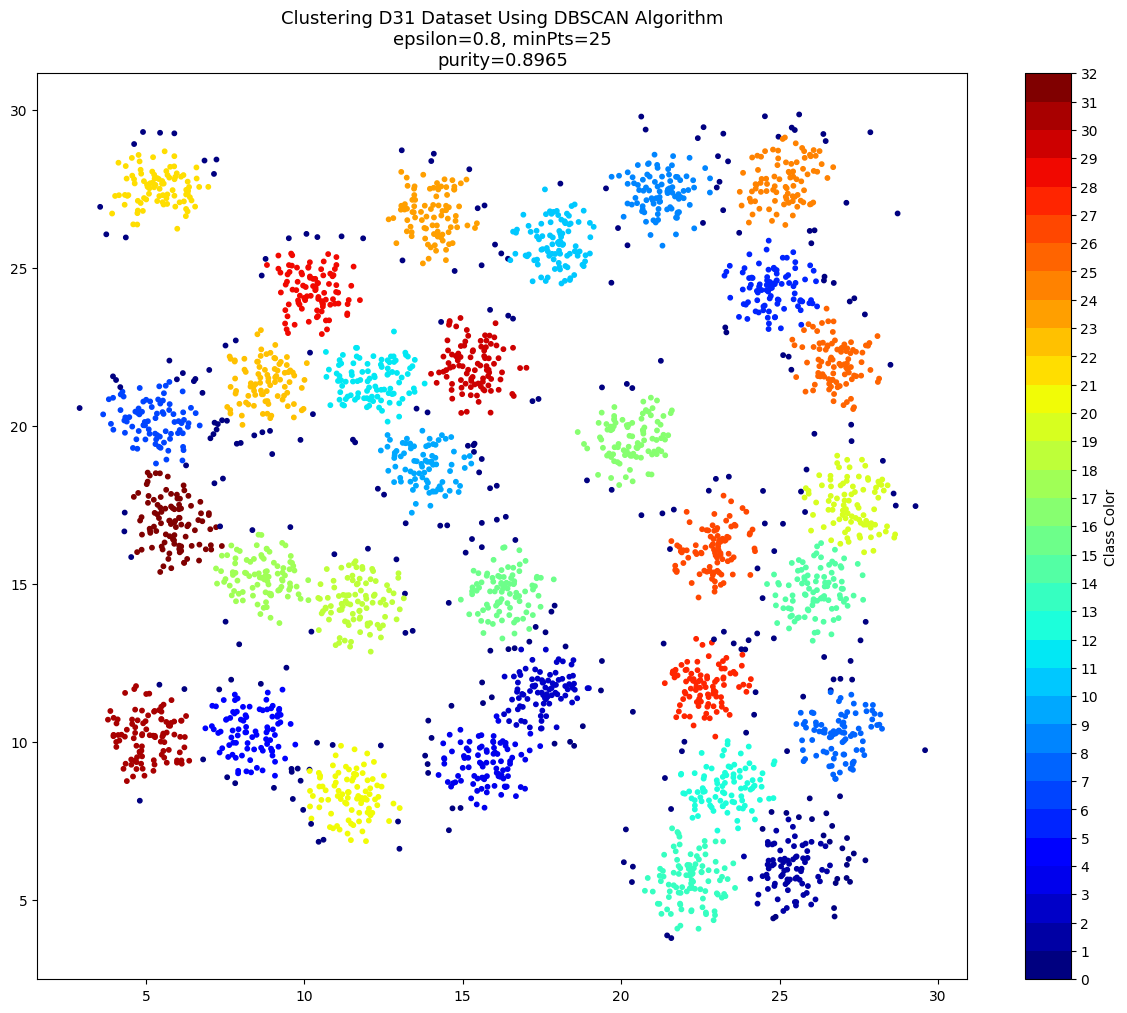

In [7]:
eps=0.8
min_pts=25
figure(figsize=(15, 12), dpi=100)
labels = dbscan(x_train=x_d31, eps=eps, min_pts=min_pts)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Class Color', cmaplist, cmap.N)
bounds = np.linspace(0,len(set(labels)),len(set(labels))+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scatter = plt.scatter(x_d31[:,0], x_d31[:,1], c=labels, cmap=cmap, norm=norm, s=10)
cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
cb.set_label('Class Color')
plt.title(f'Clustering D31 Dataset Using DBSCAN Algorithm\n'
          f'epsilon={eps}, minPts={min_pts}\n'
          f'purity={purity_score(y_d31, labels):.4f}',
          fontsize=13)
if SAVE_FIGURE:
    plt.savefig('../images/q2/d31.png')

# Spiral Dataset

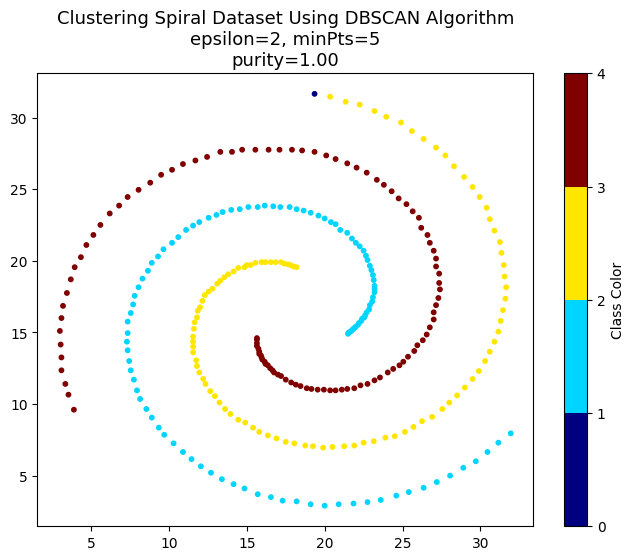

In [8]:
eps=2
min_pts=5
figure(figsize=(8, 6), dpi=100)
labels = dbscan(x_train=x_spiral, eps=eps, min_pts=min_pts)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Class Color', cmaplist, cmap.N)
bounds = np.linspace(0,len(set(labels)),len(set(labels))+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scatter = plt.scatter(x_spiral[:,0], x_spiral[:,1], c=labels, cmap=cmap, norm=norm, s=10)
cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
cb.set_label('Class Color')
plt.title(f'Clustering Spiral Dataset Using DBSCAN Algorithm\n'
          f'epsilon={eps}, minPts={min_pts}\n'
          f'purity={purity_score(y_spiral, labels):.2f}',
          fontsize=13)
if SAVE_FIGURE:
    plt.savefig('../images/q2/spiral.png')

# Pathbased Dataset

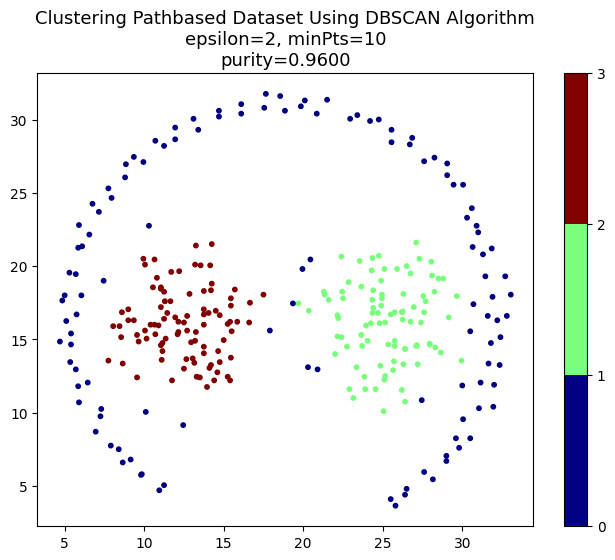

In [9]:
eps=2
min_pts=10
figure(figsize=(8, 6), dpi=100)
labels = dbscan(x_train=x_pathbased, eps=eps, min_pts=min_pts)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Class Color', cmaplist, cmap.N)
bounds = np.linspace(0,len(set(labels)),len(set(labels))+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scatter = plt.scatter(x_pathbased[:,0], x_pathbased[:,1], c=labels, cmap=cmap, norm=norm, s=10)
cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
plt.title(f'Clustering Pathbased Dataset Using DBSCAN Algorithm\n'
          f'epsilon={eps}, minPts={min_pts}\n'
          f'purity={purity_score(y_pathbased, labels):.4f}',
          fontsize=13)
if SAVE_FIGURE:
    plt.savefig('../images/q2/pathbased.png')

# Rings Dataset

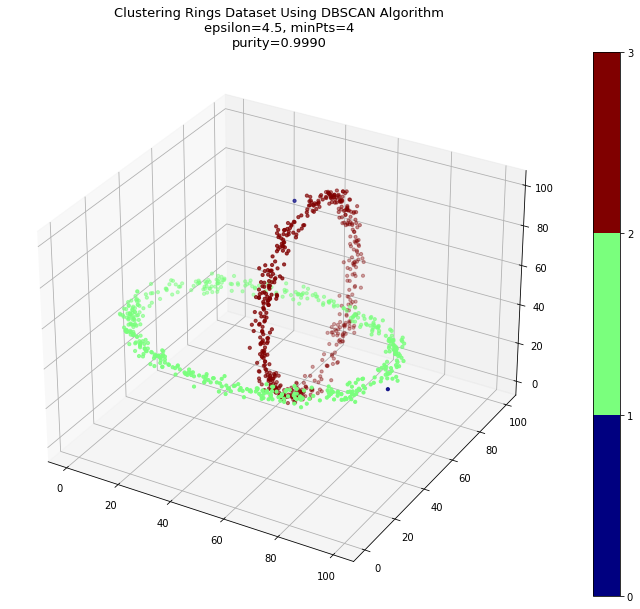

In [10]:
eps=4.5
min_pts=4
labels = dbscan(x_train=x_rings, eps=eps, min_pts=min_pts)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Class Color', cmaplist, cmap.N)
bounds = np.linspace(0,len(set(labels)),len(set(labels))+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
fig = plt.figure(figsize = (15, 10))
ax = plt.axes(projection ="3d")
scatter = ax.scatter3D(x_rings[:,0], x_rings[:,1], x_rings[:,2], c=labels, cmap=cmap, norm=norm, s=10)
fig.colorbar(scatter, spacing='proportional',ticks=bounds)
plt.title(f'Clustering Rings Dataset Using DBSCAN Algorithm\n'
          f'epsilon={eps}, minPts={min_pts}\n'
          f'purity={purity_score(y_rings, labels):.4f}',
          fontsize=13)
if SAVE_FIGURE:
    plt.savefig('../images/q2/rings.png')

# Compound Dataset

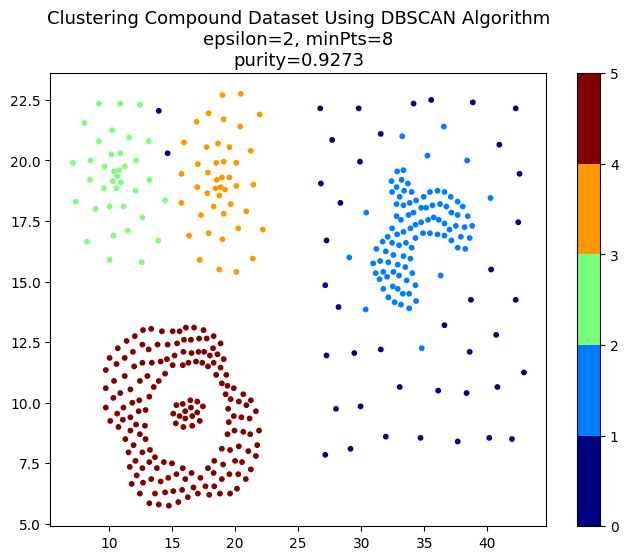

In [11]:
eps=2
min_pts=8
figure(figsize=(8, 6), dpi=100)
labels = dbscan(x_train=x_compound, eps=eps, min_pts=min_pts)
cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmap = cmap.from_list('Class Color', cmaplist, cmap.N)
bounds = np.linspace(0,len(set(labels)),len(set(labels))+1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
scatter = plt.scatter(x_compound[:,0], x_compound[:,1], c=labels, cmap=cmap, norm=norm, s=10)
cb = plt.colorbar(scatter, spacing='proportional',ticks=bounds)
plt.title(f'Clustering Compound Dataset Using DBSCAN Algorithm\n'
          f'epsilon={eps}, minPts={min_pts}\n'
          f'purity={purity_score(y_compound, labels):.4f}',
          fontsize=13)
if SAVE_FIGURE:
    plt.savefig('../images/q2/compound.png')